<a href="https://colab.research.google.com/github/440g/Machine5/blob/Open-Binary/Open-Binary/binary_open_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    auc
)

# 2. Load Data

In [2]:
# Load datasets
mon_features= pd.read_csv('../features/modified_datasets/mon_features.csv')
mon_labels = pd.read_csv('../features/modified_datasets/mon_labels.csv')

unmon_features= pd.read_csv('../features/modified_datasets/unmon_features.csv')

In [3]:
# Combine datasets
features_modified = pd.concat([mon_features, unmon_features], ignore_index=True)

# Assign labels
mon_labels = np.ones(len(mon_features))
unmon_labels = -np.ones(len(unmon_features))
labels = np.concatenate([mon_labels, unmon_labels])

In [4]:
features_modified = features_modified[['inpkt_sum_firstn', 'outpkt_sum_firstn', 'outpkt_std_ordering', 'inpkt_num', 'inpkt_avg_burst', 'inpkt_avg_ordering']]

In [5]:
#check the shape of features_modified
features_modified

,inpkt_sum_firstn,outpkt_sum_firstn,outpkt_std_ordering,inpkt_num,inpkt_avg_burst,inpkt_avg_ordering
0,16.10,7.39,515.483953,1300,16.666667,704.106154
1,27.52,9.71,139.231951,438,9.319149,264.406393
2,28.09,7.83,472.735508,1240,16.315789,668.259677
3,25.24,11.53,513.916038,1324,16.550000,713.503021
4,19.71,7.17,503.993490,1291,16.341772,694.740511
...,...,...,...,...,...,...
28995,48.06,17.30,1173.380403,4180,16.328125,2270.961722
28996,75.71,42.56,1621.869237,4663,20.724444,2505.849024
28997,30.53,17.90,118.245320,302,10.785714,180.175497
28998,48.14,20.69,166.667122,413,7.375000,241.169492


# 3. Preprocess Data

In [6]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    features_modified, labels, test_size=0.2, random_state=1
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Build and Train the RandomForest Model

Accuracy: 0.8283
Precision: 0.8652
Recall: 0.8795


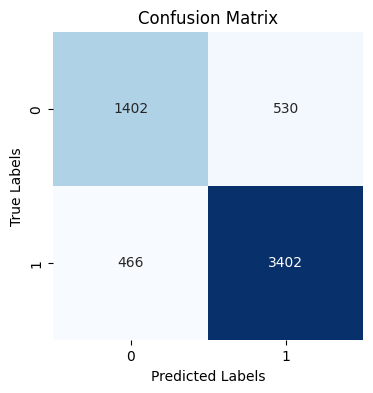

In [7]:
# Train Random Forest model
rf_binary = RandomForestClassifier(n_jobs=-1, random_state=42)
rf_binary.fit(X_train_scaled, y_train)

# Evaluate model on test data
y_pred = rf_binary.predict(X_test_scaled)

# Calculate basic evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# 5. Hyperparameter Tuning

In [8]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [500, 1000, 1500],
    'max_depth': [10, 20, 30, 40, 50],
    'max_leaf_nodes': [100, 200, 300],
    'class_weight': ['balanced']
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf_binary, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Retrieve best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)

Best Hyperparameters: {'class_weight': 'balanced', 'max_depth': 30, 'max_leaf_nodes': 300, 'n_estimators': 1000}
Best Model: RandomForestClassifier(class_weight='balanced', max_depth=30,
                       max_leaf_nodes=300, n_estimators=1000, n_jobs=-1,
                       random_state=42)


# 6. Evaluate the Tuned Model

Tuned Model Accuracy: 0.8064
Tuned Model Precision: 0.8943
Tuned Model Recall: 0.8048
Tuned Model ROC AUC: 0.8072
Tuned Model PR AUC: 0.9146


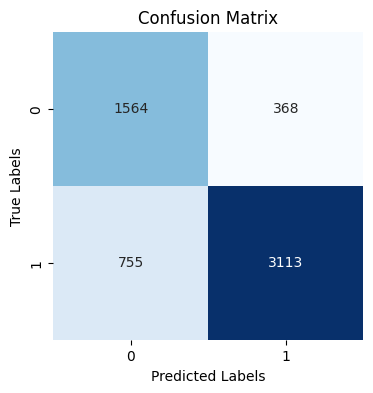

In [11]:
# Predict using the tuned model
y_pred_best = best_model.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, pos_label=1)
recall_best = recall_score(y_test, y_pred_best, pos_label=1)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

fpr_best, tpr_best, _ = roc_curve(y_test, y_pred_best, pos_label=1)
roc_auc_best = auc(fpr_best, tpr_best)

precision_values_best, recall_values_best, _ = precision_recall_curve(y_test, y_pred_best, pos_label=1)
pr_auc_best = auc(recall_values_best, precision_values_best)

# Display results
print(f"Tuned Model Accuracy: {accuracy_best:.4f}")
print(f"Tuned Model Precision: {precision_best:.4f}")
print(f"Tuned Model Recall: {recall_best:.4f}")
print(f"Tuned Model ROC AUC: {roc_auc_best:.4f}")
print(f"Tuned Model PR AUC: {pr_auc_best:.4f}")
cm = conf_matrix_best
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Visualize Results

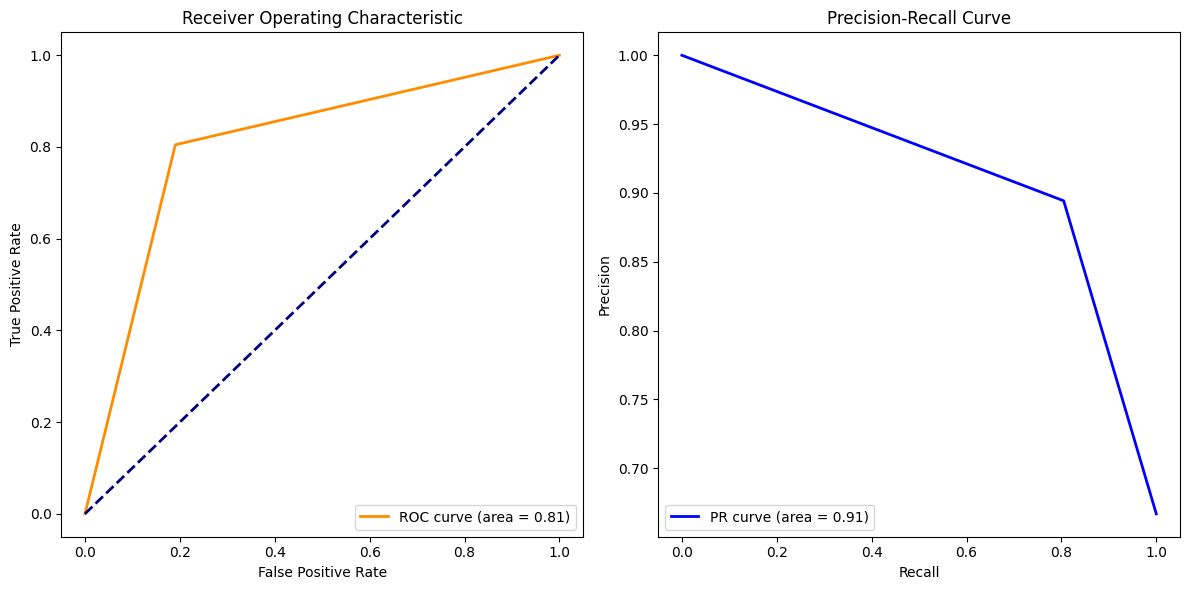

In [10]:
# ROC Curve
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr_best, tpr_best, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_best:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall_values_best, precision_values_best, color='blue', lw=2, label=f'PR curve (area = {pr_auc_best:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()